# Herron Topic 1 - Web Data, Log and Simple Returns, and Portfolio Math

This notebook covers three topics:

1. How to download web data with the yfinance and pandas-datareader packages
1. How to calculate log and simple returns
1. How to calculate portfolio returns

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

## Web Data

We will typically use the yfinance and pandas-datarader packages to download data from the web.
If you followed my instructions to install Miniconda on your computer, you have already installed these packages.

### The yfinance Package

The [yfinance package](https://github.com/ranaroussi/yfinance) provides "a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance."
Other packages provide similar functionality, but yfinance is best.

In [3]:
import yfinance as yf

We can download data for the MATANA stocks (Microsoft, Alphabet, Tesla, Amazon, Nvidia, and Apple).
We can pass tickers as either a space-delimited string or a list of strings.

In [4]:
df = yf.download(tickers='MSFT GOOG TSLA AMZN NVDA AAPL')
df

[*********************100%%**********************]  6 of 6 completed


Adj Close                                                 Close  \
                AAPL     AMZN     GOOG     MSFT     NVDA     TSLA     AAPL   
Date                                                                         
1980-12-12    0.0993      NaN      NaN      NaN      NaN      NaN   0.1283   
1980-12-15    0.0941      NaN      NaN      NaN      NaN      NaN   0.1217   
1980-12-16    0.0872      NaN      NaN      NaN      NaN      NaN   0.1127   
1980-12-17    0.0894      NaN      NaN      NaN      NaN      NaN   0.1155   
1980-12-18    0.0920      NaN      NaN      NaN      NaN      NaN   0.1189   
...              ...      ...      ...      ...      ...      ...      ...   
2024-01-26  192.4200 159.1200 153.7900 403.9300 610.3100 183.2500 192.4200   
2024-01-29  191.7300 161.2600 154.8400 409.7200 624.6500 190.9300 191.7300   
2024-01-30  188.0400 159.0000 153.0500 408.5900 627.7400 191.5900 188.0400   
2024-01-31  184.4000 155.2000 141.8000 397.5800 615.2700 187.2900 184.4000   
2024-02-01  186.8600 159.2800 142.7100 403.7800 630.2700 188.8600 186.8600   

                                       ...     Open                    \
               AMZN     GOOG     MSFT  ...     GOOG     MSFT     NVDA   
Date                                   ...                              
1980-12-12      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1980-12-15      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1980-12-16      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1980-12-17      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1980-12-18      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2024-01-26 159.1200 153.7900 403.9300  ... 152.8700 404.3700 609.6000   
2024-01-29 161.2600 154.8400 409.7200  ... 153.6400 406.0600 612.3200   
2024-01-30 159.0000 153.0500 408.5900  ... 154.0100 412.2600 629.0000   
2024-01-31 155.2000 141.8000 397.5800  ... 145.3900 406.9600 614.4000   
2024-02-01 159.2800 142.7100 403.7800  ... 143.6900 401.8300 621.0000   

                        Volume                                            \
               TSLA       AAPL          AMZN          GOOG          MSFT   
Date                                                                       
1980-12-12      NaN  469033600           NaN           NaN           NaN   
1980-12-15      NaN  175884800           NaN           NaN           NaN   
1980-12-16      NaN  105728000           NaN           NaN           NaN   
1980-12-17      NaN   86441600           NaN           NaN           NaN   
1980-12-18      NaN   73449600           NaN           NaN           NaN   
...             ...        ...           ...           ...           ...   
2024-01-26 185.5000   44553400 51001100.0000 19483600.0000 17786700.0000   
2024-01-29 185.6300   47145600 45270400.0000 20909300.0000 24510200.0000   
2024-01-30 195.3300   55859400 45207400.0000 26578900.0000 33477600.0000   
2024-01-31 187.0000   55467800 50284400.0000 43908600.0000 47871100.0000   
2024-02-01 188.5000   52672619 63406285.0000 24997783.0000 29155588.0000   

                                         
                    NVDA           TSLA  
Date                                     
1980-12-12           NaN            NaN  
1980-12-15           NaN            NaN  
1980-12-16           NaN            NaN  
1980-12-17           NaN            NaN  
1980-12-18           NaN            NaN  
...                  ...            ...  
2024-01-26 38983800.0000 107063400.0000  
2024-01-29 34873300.0000 125013100.0000  
2024-01-30 41073500.0000 109982300.0000  
2024-01-31 45379500.0000 103221400.0000  
2024-02-01 35818376.0000  90546003.0000  

[10875 rows x 36 columns]

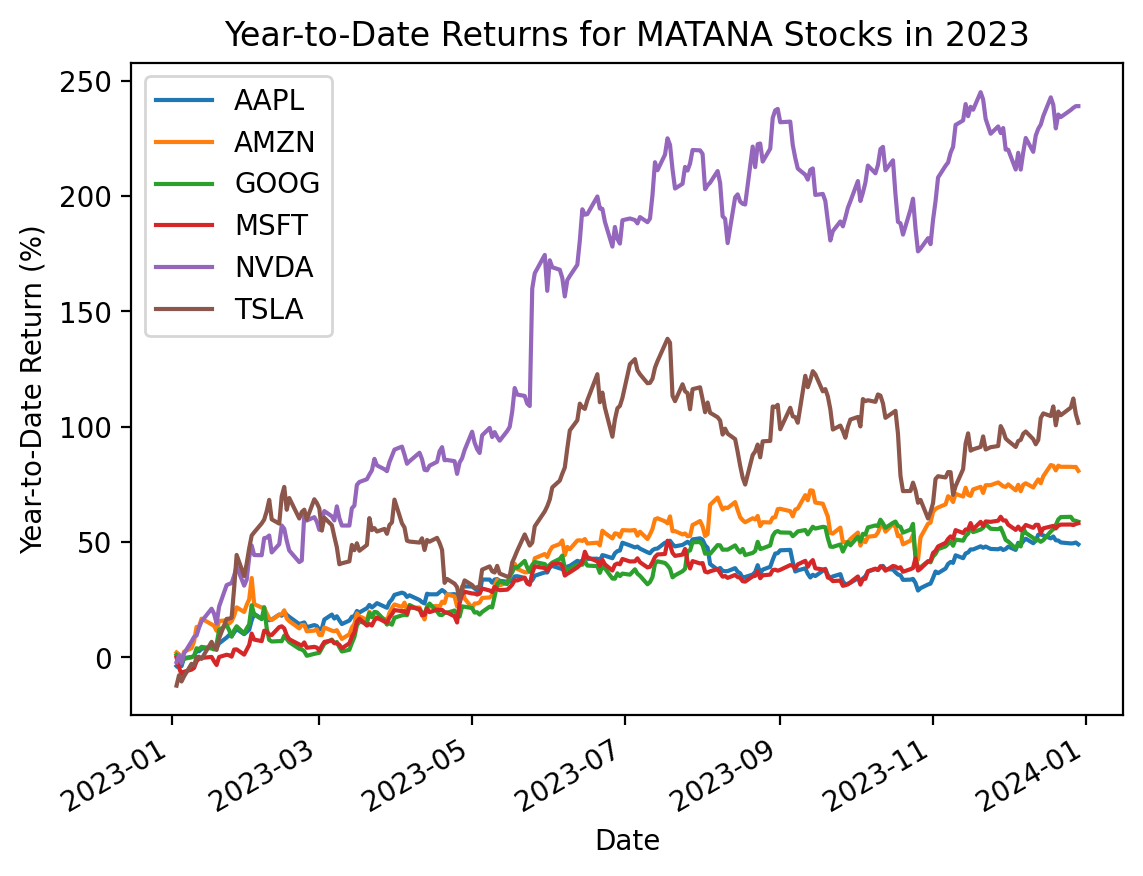

In [12]:
(
    df
    ['Adj Close']
    .pct_change()
    .loc['2023']
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.ylabel('Year-to-Date Return (%)')
plt.title('Year-to-Date Returns for MATANA Stocks in 2023')
plt.show()

### The pandas-datareader package

The [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) package provides easy access to various data sources, including [the Kenneth French Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) and [the Federal Reserve Economic Data (FRED)](https://fred.stlouisfed.org/).
The pandas-datareader package also downloads Yahoo! Finance data, but the yfinance package has better documentation.
We will use `pdr` as the abbreviated prefix for pandas-datareader.

In [13]:
import pandas_datareader as pdr

Here we download the daily benchmark factors from Ken French's Data Library.

In [15]:
pdr.famafrench.get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

For Fama and French data, pandas-datareader returns the most recent five years of data unless we specify a `start` date.
French typically provides data back through the second half of 1926.
pandas-datareader returns dictionaries of data frames, and the `'DESCR'` value describes these data frames.

In [16]:
ff_all = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1900'
)

C:\Users\r.herron\AppData\Local\Temp\ipykernel_26796\2526882917.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_all = pdr.DataReader(


In [17]:
type(ff_all)

dict

In [18]:
print(ff_all['DESCR'])

F-F Research Data Factors daily
-------------------------------

This file was created by CMPT_ME_BEME_RETS_DAILY using the 202312 CRSP database. The Tbill return is the simple daily rate that, over the number of trading days in the month, compounds to 1-month TBill rate from Ibbotson and Associates Inc. Copyright 2023 Kenneth R. French

  0 : (25649 rows x 4 cols)


In [19]:
ff_all[0]

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.1000,-0.2500,-0.2700,0.0090
1926-07-02,0.4500,-0.3300,-0.0600,0.0090
1926-07-06,0.1700,0.3000,-0.3900,0.0090
1926-07-07,0.0900,-0.5800,0.0200,0.0090
1926-07-08,0.2100,-0.3800,0.1900,0.0090
...,...,...,...,...
2023-12-22,0.2100,0.6400,0.0900,0.0210
2023-12-26,0.4800,0.6900,0.4600,0.0210
2023-12-27,0.1600,0.1400,0.1200,0.0210


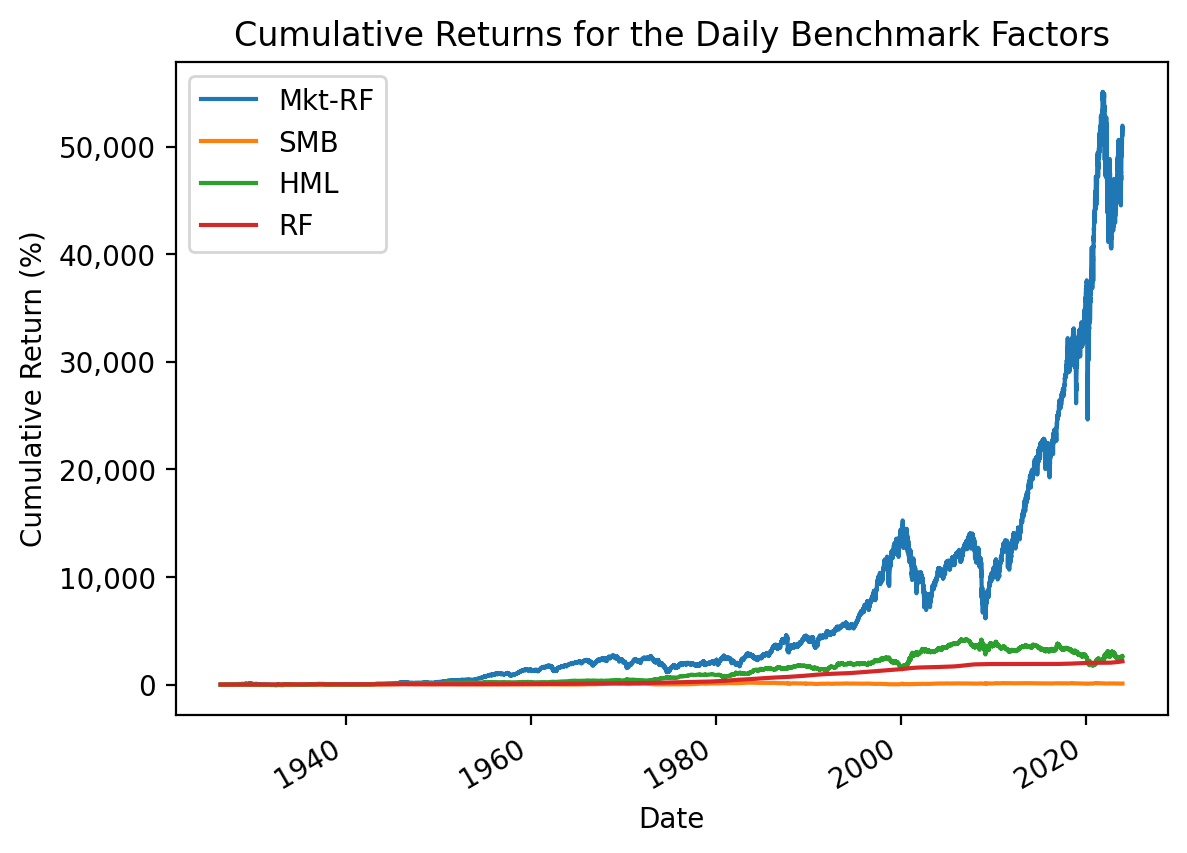

In [27]:
(
    ff_all[0] # slice factors
    .div(100) # convert to decimal
    .add(1) # calculate cumulative returns
    .cumprod()
    .sub(1)
    .mul(100) # convert to percent
    .plot() # plot
)
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns for the Daily Benchmark Factors')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.yscale('log') # log scale impractical here with negative returns
plt.show()

## Log and Simple Returns

We will typically use *simple* returns, calculated as $R_{simple,t} = \frac{P_t + D_t - P_{t-1}}{P_{t-1}} = \frac{P_t + D_t}{P_{t-1}} - 1$.
The simple return is the return that investors receive on invested dollars.
We can calculate simple returns from Yahoo Finance data with the `.pct_change()` method on the adjusted close column (i.e., `Adj Close`), which adjusts for dividends and splits.
The adjusted close column is a reverse-engineered close price (i.e., end-of-trading-day price) that incorporates dividends and splits, making simple return calculations easy.

However, we may see *log* returns elsewhere, which are the (natural) log of one plus simple returns:
$$R_{log,t} = \log(1 + R_{simple,t}) = \log\left(1 +  \frac{P_t + D_t}{P_{t-1}} - 1 \right) = \log\left(\frac{P_t + D_t}{P_{t-1}} \right) = \log(P_t + D_t) - \log(P_{t-1})$$
Therefore, we calculate log returns as either the log of one plus simple returns or the difference of the logs of the adjusted close column.
Log returns are also known as *continuously-compounded* returns.

We will typically use *simple* returns instead of *log* returns.
However, this section explains the differences between simple and log returns and where each is appropriate.

### Simple and Log Returns are Similar for Small Returns

$\log(1 + x) \approx x$ for small values of $x$, so simple returns and log returns are similar for small returns.
Returns are typically small at daily and monthly horizons, so the difference between simple and log returns is small at these horizons.
The following figure shows $R_{simple,t} \approx R_{log,t}$ for small $R$s.

In [28]:
R = np.linspace(-0.75, 0.75, 100)
logR = np.log(1 + R)

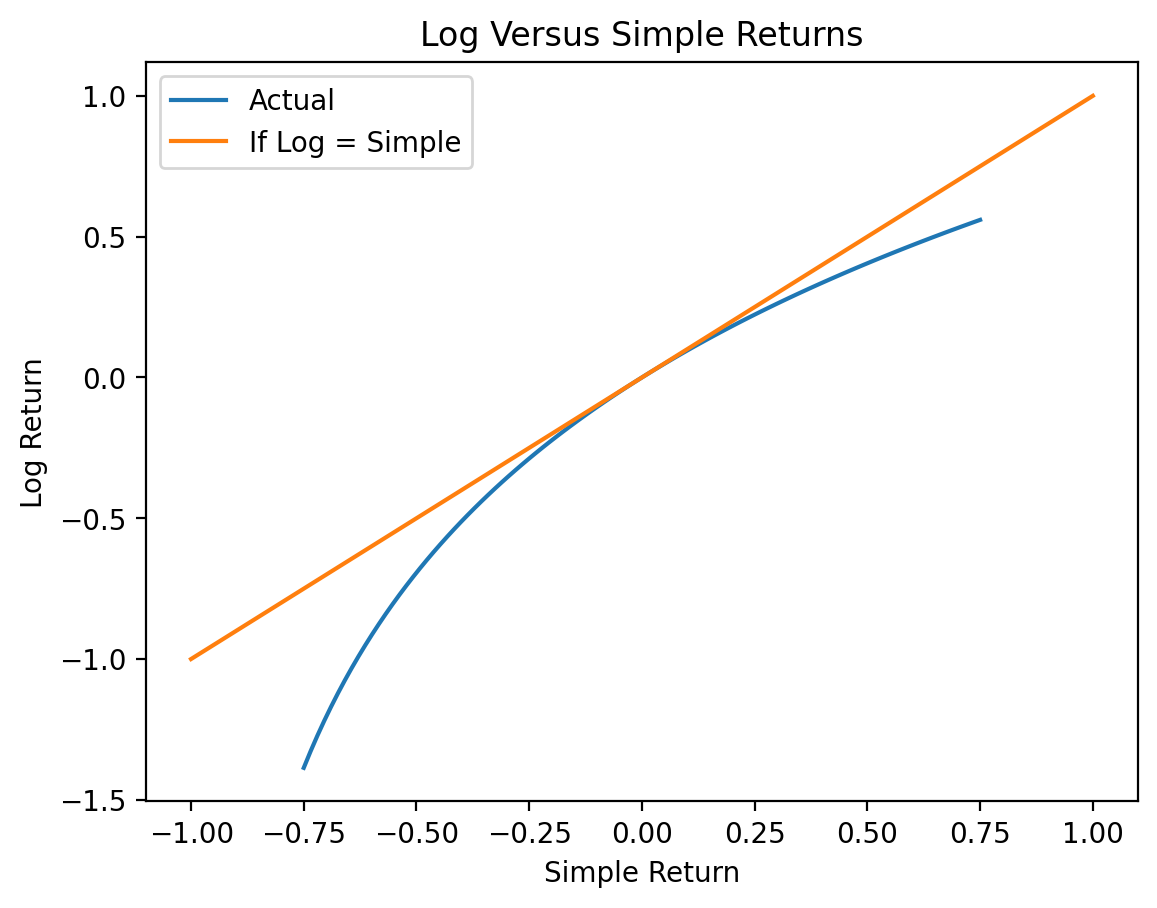

In [31]:
plt.plot(R, logR)
plt.plot([-1, 1], [-1, 1])
plt.xlabel('Simple Return')
plt.ylabel('Log Return')
plt.title('Log Versus Simple Returns')
plt.legend(['Actual', 'If Log = Simple'])
plt.show()

### Simple Return Advantage: Portfolio Calculations

We can only perform portfolio calculations with simple returns.
For a portfolio of $N$ assets with portfolio weights $w_i$, the portfolio return $R_{p}$ is the weighted average of the returns of its assets, $R_{p} = \sum_{i=1}^N w_i R_{i}$.
For two stocks with portfolio weights of 50%, our portfolio return is $R_{portfolio} = 0.5 R_1 + 0.5 R_2 = \frac{R_1 + R_2}{2}$.
However, we cannot calculate portfolio returns with log returns because the sum of logs is the log of products.

***We cannot calculate portfolio returns as the weighted average of log returns.***

### Log Return Advantage: Log Returns are Additive

The advantage of log returns is that we can compound log returns with addition.
The additive property of log returns makes code simple, computations fast, and proofs easy when we compound returns over multiple periods.

We compound returns from $t=0$ to $t=T$ as follows:
$$1 + R_{0, T} = (1 + R_1) \times (1 + R_2) \times \dots \times (1 + R_T)$$

Next, we take the log of both sides of the previous equation and use the property that the log of products is the sum of logs:
$$\log(1 + R_{0, T}) = \log((1 + R_1) \times (1 + R_2) \times \dots \times (1 + R_T)) = \log(1 + R_1) + \log(1 + R_2) + \dots + \log(1 + R_T) = \sum_{t=1}^T \log(1 + R_t)$$

Next, we exponentiate both sides of the previous equation:
$$e^{\log(1 + R_{0, T})} = e^{\sum_{t=0}^T \log(1 + R_t)}$$

Next, we use the property that $e^{\log(x)} = x$ to simplify the previous equation:
$$1 + R_{0,T} = e^{\sum_{t=0}^T \log(1 + R_t)}$$

Finally, we subtract 1 from both sides:
$$R_{0 ,T} = e^{\sum_{t=0}^T \log(1 + R_t)} - 1$$

So, the return $R_{0,T}$ from $t=0$ to $t=T$ is the exponentiated sum of log returns.
The pandas developers assume users understand the math above and focus on optimizing sums.

The following code generates 10,000 random log returns.
The `np.random.randn()` call generates normally distributed random numbers.
To generate equivalent simple returns, we exponentiate these log returns, then subtract one.

In [33]:
np.random.seed(42)
df2 = pd.DataFrame(data={'R': np.exp(np.random.randn(10000)) - 1})
df2

,R
0,0.6433
1,-0.1291
2,0.9111
3,3.5861
4,-0.2088
...,...
9995,2.6733
9996,-0.8644
9997,-0.5060
9998,0.6418


In [34]:
df2.describe()

,R
count,10000.0000
mean,0.6529
std,2.1918
min,-0.9802
25%,-0.4896
50%,-0.0026
75%,0.9564
max,49.7158


We can time the calculation of 12-observation rolling returns.
We use `.apply()` for the simple return version because `.rolling()` does not have a product method.
We find that `.rolling()` is slower with `.apply()` than with `.sum()` by a factor of 2,000.
***We will learn about `.rolling()` and `.apply()` in a few weeks, but they provide the best example of when to use log returns.***


In [35]:
%%timeit
df2['R12_via_simple'] = (
    df2['R']
    .add(1)
    .rolling(12)
    .apply(lambda x: x.prod())
    .sub(1)
)

284 ms ± 80.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
df2['R12_via_log'] = (
    df2['R']
    .add(1)
    .pipe(np.log)
    .rolling(12)
    .sum()
    .pipe(np.exp)
    .sub(1)
)

557 µs ± 60.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [39]:
df2.head(15)

,R,R12_via_simple,R12_via_log
0,0.6433,NaN,NaN
1,-0.1291,NaN,NaN
2,0.9111,NaN,NaN
3,3.5861,NaN,NaN
4,-0.2088,NaN,NaN
5,-0.2087,NaN,NaN
6,3.8511,NaN,NaN
7,1.1542,NaN,NaN
8,-0.3747,NaN,NaN
9,0.7204,NaN,NaN


In [41]:
np.allclose(df2['R12_via_simple'], df2['R12_via_log'], equal_nan=True)

True

These two approaches calculate the same return, but the simple-return approach is 1,000 times slower than the log-return approach!

***We can use log returns to calculate total returns very quickly!***

## Portfolio Math

Portfolio return $R_{p}$ is the weighted average of its asset returns, so $R_{p} = \sum_{i=1}^N w_i R_{i}$.
Here $N$ is the number of assets, and $w_i$ is the weight on asset $i$.

### The 1/N Portfolio

The $\frac{1}{N}$ portfolio equally weights portfolio assets, so $w_1 = w_2 = \dots = w_N = \frac{1}{N}$.
We typically rebalance the $\frac{1}{N}$ portfolio every period.
If $w_i = \frac{1}{N}$, then $R_{p} = \sum_{i=1}^N \frac{1}{N} R_{i} = \frac{\sum_{i=1}^N R_i}{N} = \bar{R}$.
Therefore, we can use `.mean()` to calculate $\frac{1}{N}$ portfolio returns.

In [43]:
returns = df['Adj Close'].pct_change().loc['2023']

returns

,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
Date,,,,,,
2023-01-03,-0.0374,0.0217,0.0109,-0.0010,-0.0205,-0.1224
2023-01-04,0.0103,-0.0079,-0.0110,-0.0437,0.0303,0.0512
2023-01-05,-0.0106,-0.0237,-0.0219,-0.0296,-0.0328,-0.0290
2023-01-06,0.0368,0.0356,0.0160,0.0118,0.0416,0.0247
2023-01-09,0.0041,0.0149,0.0073,0.0097,0.0518,0.0593
...,...,...,...,...,...,...
2023-12-22,-0.0055,-0.0027,0.0065,0.0028,-0.0033,-0.0077
2023-12-26,-0.0028,-0.0001,0.0007,0.0002,0.0092,0.0161
2023-12-27,0.0005,-0.0005,-0.0097,-0.0016,0.0028,0.0188


In [44]:
returns.mean()

AAPL   0.0017
AMZN   0.0026
GOOG   0.0020
MSFT   0.0020
NVDA   0.0053
TSLA   0.0034
dtype: float64

In [45]:
rp_1 = returns.mean(axis=1)
rp_1

Date
2023-01-03   -0.0248
2023-01-04    0.0049
2023-01-05   -0.0246
2023-01-06    0.0278
2023-01-09    0.0245
               ...  
2023-12-22   -0.0017
2023-12-26    0.0039
2023-12-27    0.0017
2023-12-28   -0.0041
2023-12-29   -0.0056
Length: 250, dtype: float64

***Note that when we apply the same portfolio weights every period, we rebalance at the same frequency as the returns data.***
If we have daily data, rebalance daily.
If we have monthly data, we rebalance monthly, and so on.

### A More General Solution

If we combine weights into vector $w$ and the time series of asset returns into matrix $\mathbf{R}$, then we can calculate the time series of portfolio returns as $R_p = w^T \mathbf{R}$.
The pandas version of this calculation is `R.dot(w)`, where `R` is a data frame of asset returns and `w` is a series of portfolio weights.
We can use this approach to calculate $\frac{1}{N}$ portfolio returns, too.

In [47]:
weights = np.ones(returns.shape[1]) / returns.shape[1]
weights

array([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [48]:
rp_2 = returns.dot(weights)
rp_2

Date
2023-01-03   -0.0248
2023-01-04    0.0049
2023-01-05   -0.0246
2023-01-06    0.0278
2023-01-09    0.0245
               ...  
2023-12-22   -0.0017
2023-12-26    0.0039
2023-12-27    0.0017
2023-12-28   -0.0041
2023-12-29   -0.0056
Length: 250, dtype: float64

Both approaches give the same answer!

In [49]:
np.allclose(rp_1, rp_2, equal_nan=True)

True